In [ ]:
# Librer칤as necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import zipfile

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blood+transfusion+service+center.zip to blood+transfusion+service+center.zip


In [ ]:
# Extraer solo el archivo de datos
with zipfile.ZipFile('blood+transfusion+service+center.zip', 'r') as zip_ref:
    zip_ref.extract('transfusion.data')

In [ ]:

# Definir nombres de las columnas seg칰n el archivo .names
column_names = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']

# Cargar los datos con nombres de columnas
df = pd.read_csv('transfusion.data', names=column_names, header=0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Verificamos que no existe la presencia de valores nulos y el tipo de datos esta correcto.

R (Recency - months since last donation),

F (Frequency - total number of donation),

M (Monetary - total blood donated in c.c.),

T (Time - months since first donation),

a binary variable representing whether he/she donated blood in March 2007 (1
stand for donating blood; 0 stands for not donating blood).

In [ ]:
df.describe()

Recency   Frequency      Monetary        Time     Donated
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086    0.237968
std      8.095396    5.839307   1459.826781   24.376714    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   98.000000    1.000000

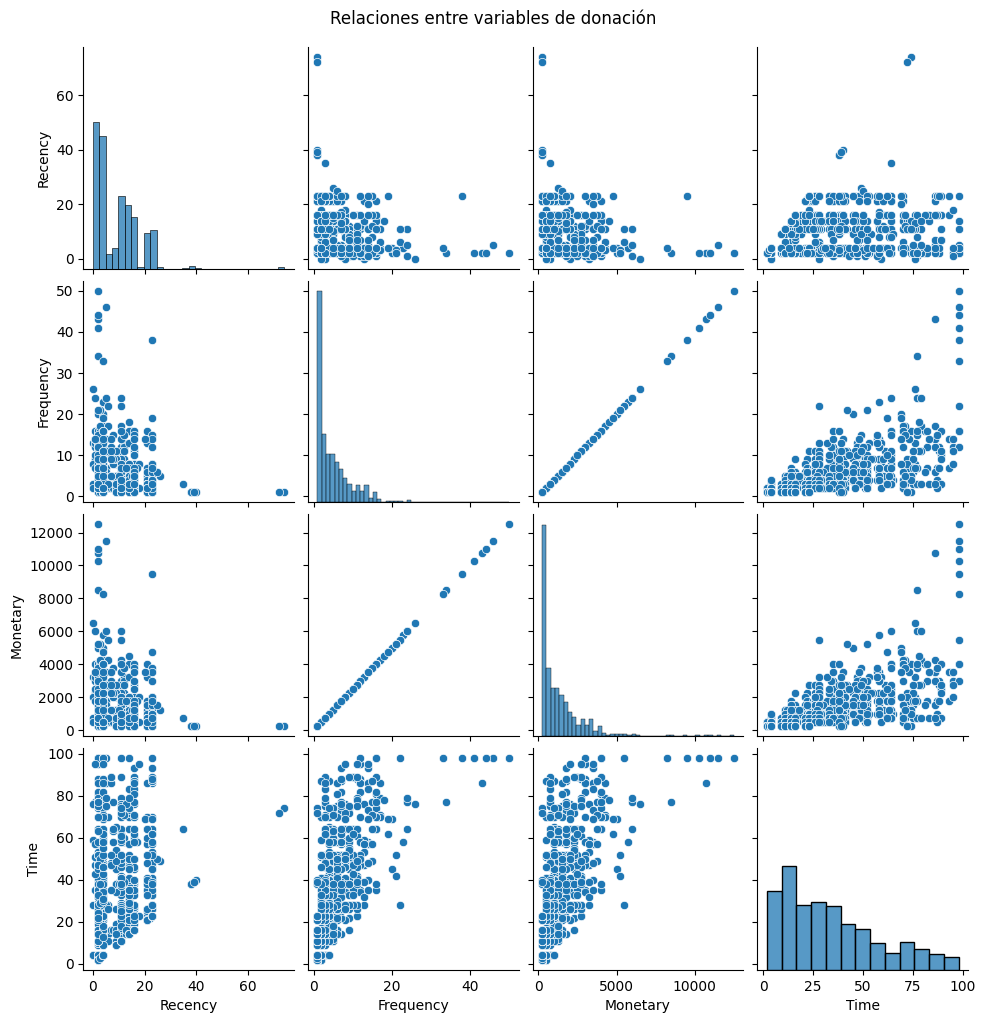

In [ ]:
# --- Exploraci칩n visual inicial ---
sns.pairplot(df.drop('Donated', axis=1))
plt.suptitle("Relaciones entre variables de donaci칩n", y=1.02)
plt.show()

Las variables Recency, Frequency, Monetary y Time est치n sesgadas a la derecha. Hay una gran concentraci칩n de valores bajos con algunos valores mucho m치s altos (colas largas).

 Frequency y Monetary: Se observa una l칤nea diagonal perfecta, lo que tiene sentido ya que Monetary representa el n칰mero total de unidades de sangre donadas (cantidad fija multiplicada por la frecuencia).

 No hay una tendencia clara entre Recency (d칤as desde la 칰ltima donaci칩n) y las dem치s variables.

 Time con mayor dispersion , Algunos donantes tienen per칤odos muy largos como clientes..

In [ ]:

# --- Escalado de las variables ---
features = ['Recency', 'Frequency', 'Monetary', 'Time']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(X_scaled, columns=features)

In [ ]:
# --- Funci칩n para detectar outliers por IQR ---
def detect_outliers_iqr(dataframe):
    outliers = pd.DataFrame(False, index=dataframe.index, columns=dataframe.columns)
    for col in dataframe.columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)
    return outliers

In [ ]:

# --- Detecci칩n de outliers por columna ---
outliers_iqr = detect_outliers_iqr(df_scaled)
df['outlier_iqr'] = outliers_iqr.any(axis=1)

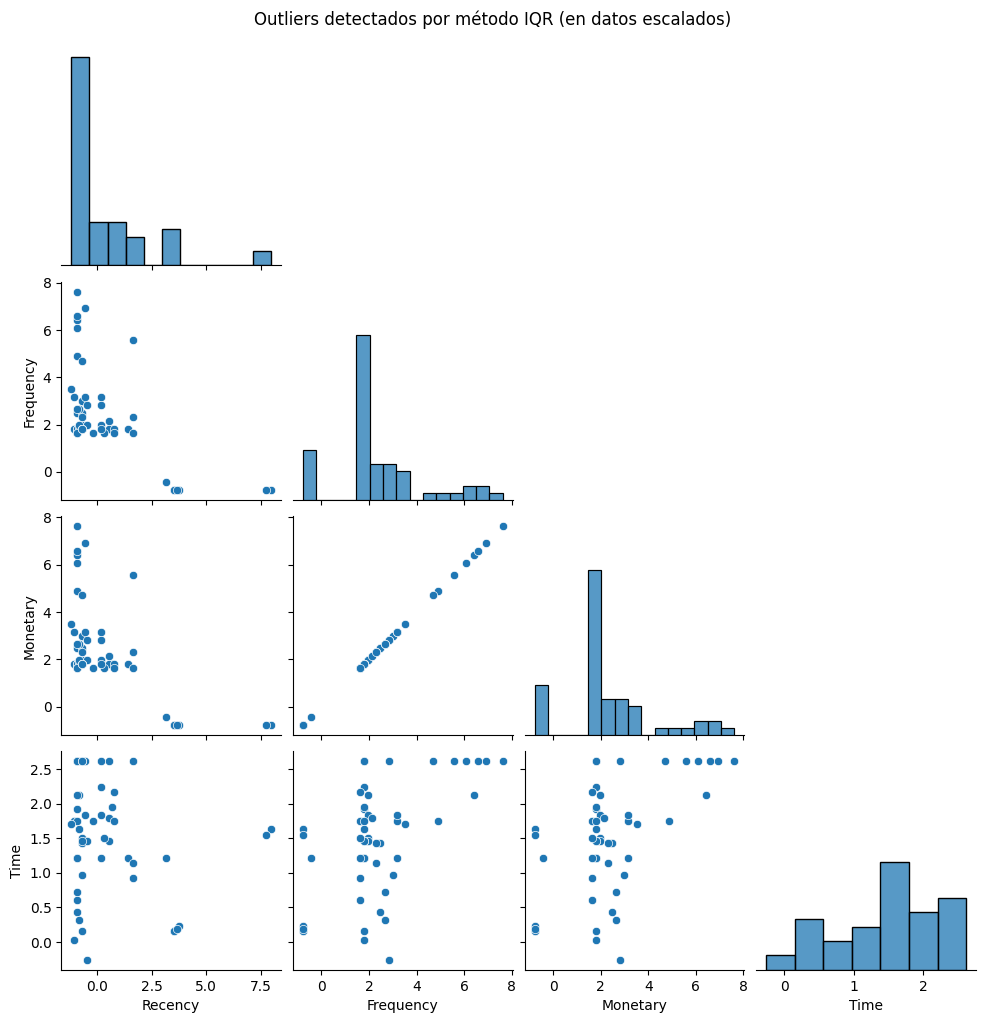

游댌 Total de outliers detectados con IQR (en alguna variable): 52


In [ ]:
# --- Visualizaci칩n ---
sns.pairplot(df_scaled[outliers_iqr.any(axis=1)], corner=True)
plt.suptitle("Outliers detectados por m칠todo IQR (en datos escalados)", y=1.02)
plt.show()

# --- Resultado final ---
total_outliers = df['outlier_iqr'].sum()
print(f"游댌 Total de outliers detectados con IQR (en alguna variable): {total_outliers}")

Estos puntos est치n lejos del "centro" de los datos, lo que indica donantes muy diferentes del patr칩n general (por ejemplo, donantes extremadamente frecuentes o recientes).

Densidad concentrada en el centro: La mayor칤a de los datos est치n agrupados cerca del origen (0), lo cual es t칤pico luego del escalado.



Conclusiones generales
El dataset contiene valores at칤picos reales, especialmente en Frequency, Monetary y Recency. Esto indica la presencia de donantes que difieren fuertemente del patr칩n com칰n (p. ej., algunos han donado muchas m치s veces que el promedio o lo han hecho muy recientemente).

El escalado mejora la visibilidad de estos valores extremos. Esto es 칰til antes de aplicar modelos de clustering, PCA o algoritmos sensibles a la escala.
